<a href="https://colab.research.google.com/github/omkar806/Car_Detection_CNN/blob/main/Car_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sshikamaru/car-object-detection
!unzip \*.zip  && rm *.zip

 99% 111M/112M [00:01<00:00, 108MB/s] 
100% 112M/112M [00:01<00:00, 94.7MB/s]
Archive:  car-object-detection.zip
  inflating: data/sample_submission.csv  
  inflating: data/testing_images/vid_5_25100.jpg  
  inflating: data/testing_images/vid_5_25120.jpg  
  inflating: data/testing_images/vid_5_25140.jpg  
  inflating: data/testing_images/vid_5_25160.jpg  
  inflating: data/testing_images/vid_5_25180.jpg  
  inflating: data/testing_images/vid_5_25200.jpg  
  inflating: data/testing_images/vid_5_25220.jpg  
  inflating: data/testing_images/vid_5_25240.jpg  
  inflating: data/testing_images/vid_5_25260.jpg  
  inflating: data/testing_images/vid_5_26320.jpg  
  inflating: data/testing_images/vid_5_26400.jpg  
  inflating: data/testing_images/vid_5_26420.jpg  
  inflating: data/testing_images/vid_5_26560.jpg  
  inflating: data/testing_images/vid_5_26580.jpg  
  inflating: data/testing_images/vid_5_26600.jpg  
  inflating: data/testing_images/vid_5_26620.jpg  
  inflating: data/testing_ima

In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
#Loading the dataset
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, Flatten, MaxPool2D, Dense

from pathlib import Path

In [5]:
train_path = Path("/content/data/training_images")
test_path = Path("/content/data/testing_images")

In [11]:
train = pd.read_csv("/content/data/train_solution_bounding_boxes (1).csv")
print("Raw bounding box coordinates")
train.head(30)


printing train raw


image        xmin        ymin        xmax        ymax
0    vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547
1   vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180
2   vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180
3   vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575
4   vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422
5   vid_4_10100.jpg  447.568741  160.625804  582.083936  232.517696
6   vid_4_10120.jpg  168.755427  180.677284  304.738061  246.700450
7   vid_4_10140.jpg    0.000000  188.991313   85.111433  249.145753
8    vid_4_1020.jpg  202.506512  189.480373  239.192475  229.094273
9    vid_4_1040.jpg  116.416787  189.969434  180.494935  229.094273
10  vid_4_10480.jpg  473.982634  172.852317  602.138929  231.050515
11  vid_4_10500.jpg  149.678727  190.458494  268.541245  237.408301
12  vid_4_10520.jpg    0.000000  195.349099   36.685962  234.473938
13   vid_4_1060.jpg   45.490593  192.903797  112.503618  225.670849
14  vid_4_10960.jpg  614.856729  175.297619  676.000000  217.356821
15  vid_4_10980.jpg  398.654125  188.502252  518.005789  236.919241
16  vid_4_11000.jpg  149.189580  194.860039  265.606368  242.084942
17  vid_4_11020.jpg    0.000000  197.794401   75.817656  237.408301
18  vid_4_11240.jpg  497.461650  184.100708  633.933430  231.050515
19  vid_4_11260.jpg  275.878437  197.305341  405.991317  244.744209
20  vid_4_11280.jpg   62.610709  201.217825  186.853835  243.766087
21  vid_4_11380.jpg  514.581766  176.275740  615.835022  229.094273
22  vid_4_11400.jpg  331.151954  192.414736  429.959479  233.984878
23  vid_4_11420.jpg  137.939219  197.305341  238.703328  236.430180
24  vid_4_11440.jpg    0.000000  199.261583   74.350217  235.941120
25  vid_4_11900.jpg  524.364689  184.589768  624.639653  219.313063
26  vid_4_11880.jpg  618.769899  181.655405  676.000000  218.824003
27  vid_4_11920.jpg  410.393632  193.881918  516.049204  225.670849
28  vid_4_11940.jpg  286.150507  192.414736  383.001447  228.605212
29  vid_4_11960.jpg  156.526773  195.838160  256.801737  230.072394

In [12]:
#Here we have just converted these to type of integer
train[['xmin', 'ymin', 'xmax', 'ymax']] = train[['xmin', 'ymin', 'xmax', 'ymax']].astype(int)
train.drop_duplicates(subset='image', inplace=True, ignore_index=True)
train.head(30)
#These are basically coordinates to draw bounding box along the image that is annotation of the images

image  xmin  ymin  xmax  ymax
0    vid_4_1000.jpg   281   187   327   223
1   vid_4_10000.jpg    15   187   120   236
2   vid_4_10040.jpg   239   176   361   236
3   vid_4_10020.jpg   496   172   630   231
4   vid_4_10060.jpg    16   186   132   238
5   vid_4_10100.jpg   447   160   582   232
6   vid_4_10120.jpg   168   180   304   246
7   vid_4_10140.jpg     0   188    85   249
8    vid_4_1020.jpg   202   189   239   229
9    vid_4_1040.jpg   116   189   180   229
10  vid_4_10480.jpg   473   172   602   231
11  vid_4_10500.jpg   149   190   268   237
12  vid_4_10520.jpg     0   195    36   234
13   vid_4_1060.jpg    45   192   112   225
14  vid_4_10960.jpg   614   175   676   217
15  vid_4_10980.jpg   398   188   518   236
16  vid_4_11000.jpg   149   194   265   242
17  vid_4_11020.jpg     0   197    75   237
18  vid_4_11240.jpg   497   184   633   231
19  vid_4_11260.jpg   275   197   405   244
20  vid_4_11280.jpg    62   201   186   243
21  vid_4_11380.jpg   514   176   615   229
22  vid_4_11400.jpg   331   192   429   233
23  vid_4_11420.jpg   137   197   238   236
24  vid_4_11440.jpg     0   199    74   235
25  vid_4_11900.jpg   524   184   624   219
26  vid_4_11880.jpg   618   181   676   218
27  vid_4_11920.jpg   410   193   516   225
28  vid_4_11940.jpg   286   192   383   228
29  vid_4_11960.jpg   156   195   256   230

In [20]:
def display_image(img, bbox_coords=[], pred_coords=[], norm=False):
    # if the image has been normalized, scale it up
    if norm:
        img *= 255.
        img = img.astype(np.uint8)

    # Draw the bounding boxes
    if len(bbox_coords) == 4:
        xmin, ymin, xmax, ymax = bbox_coords
        img = cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 3)

    if len(pred_coords) == 4:
        xmin, ymin, xmax, ymax = pred_coords
        img = cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 3)

    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

def display_image_from_file(name, bbox_coords=[], path=train_path):
    img = cv2.imread(str(path/name))
    display_image(img, bbox_coords=bbox_coords)

def display_from_dataframe(row, path=train_path):
    display_image_from_file(row['image'], bbox_coords=(row.xmin, row.ymin, row.xmax, row.ymax), path=path)


def display_grid(df=train, n_items=3):
    plt.figure(figsize=(20, 10))

    # get 3 random entries and plot them in a 1x3 grid
    rand_indices = [np.random.randint(0, df.shape[0]) for _ in range(n_items)]

    for pos, index in enumerate(rand_indices):
        plt.subplot(1, n_items, pos + 1)
        display_from_dataframe(df.loc[index, :])

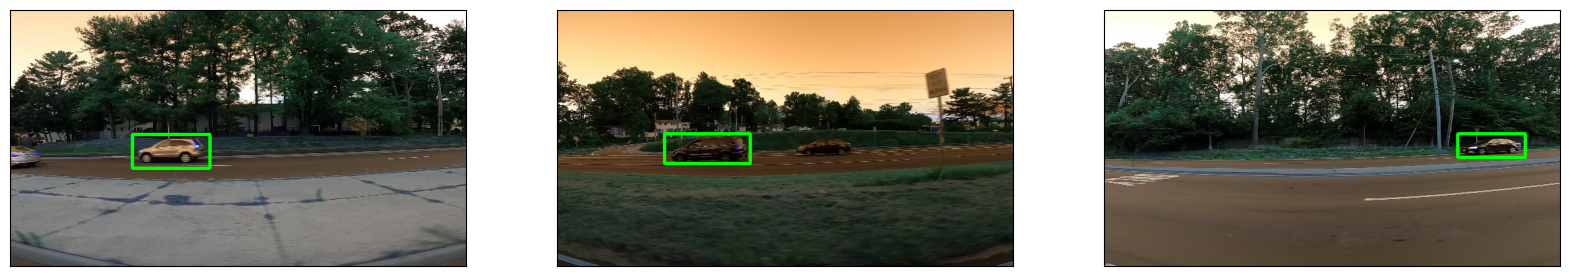

In [21]:
display_grid()

In [22]:
def data_generator(df=train, batch_size=16, path=train_path):
    while True:
        images = np.zeros((batch_size, 380, 676, 3))
        bounding_box_coords = np.zeros((batch_size, 4))

        for i in range(batch_size):
                rand_index = np.random.randint(0, train.shape[0])
                row = df.loc[rand_index, :]
                images[i] = cv2.imread(str(train_path/row.image)) / 255.
                bounding_box_coords[i] = np.array([row.xmin, row.ymin, row.xmax, row.ymax])

        yield {'image': images}, {'coords': bounding_box_coords}

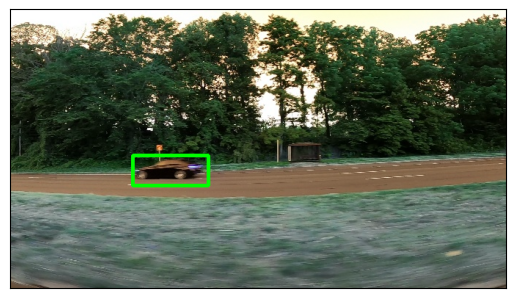

In [23]:
# Test the generator
example, label = next(data_generator(batch_size=1))
img = example['image'][0]
bbox_coords = label['coords'][0]

display_image(img, bbox_coords=bbox_coords, norm=True)

In [24]:
input_ = Input(shape=[380, 676, 3], name='image')

x = input_

for i in range(10):
    n_filters = 2**(i + 3)
    x = Conv2D(n_filters, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2, padding='same')(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(4, name='coords')(x)

model = tf.keras.models.Model(input_, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 380, 676, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 380, 676, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 380, 676, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 190, 338, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 190, 338, 16)      1168      
                                                                 
 batch_normalization_1 (Bat  (None, 190, 338, 16)      64    

In [25]:
model.compile(
    loss={
        'coords': 'mse'
    },
    optimizer=tf.keras.optimizers.Adam(1e-3),
    metrics={
        'coords': 'accuracy'
    }
)

In [26]:
def test_model(model, datagen):
    example, label = next(datagen)

    X = example['image']
    y = label['coords']

    pred_bbox = model.predict(X)[0]

    img = X[0]
    gt_coords = y[0]

    display_image(img, pred_coords=pred_bbox, norm=True)

def test(model):
    datagen = data_generator(batch_size=1)

    plt.figure(figsize=(15,7))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        test_model(model, datagen)
    plt.show()

class ShowTestImages(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test(self.model)

1/1 [==============================] - 0s 20ms/step


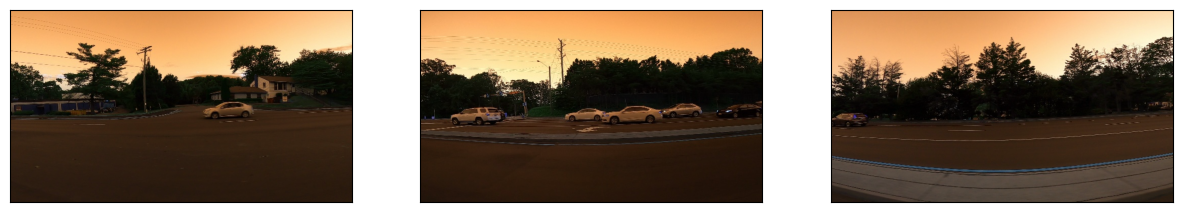

In [27]:
test(model)

Epoch 1/9
  6/500 [..............................] - ETA: 1:53 - loss: 69726.1172 - accuracy: 0.1146

1/1 [==============================] - 0s 35ms/step


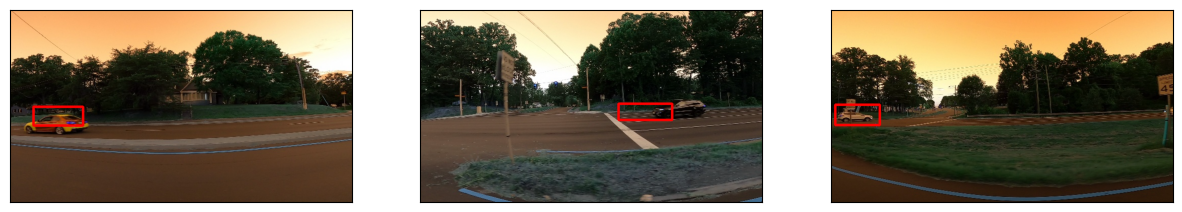

500/500 [==============================] - 159s 288ms/step - loss: 4958.4883 - accuracy: 0.8777
Epoch 2/9
1/1 [==============================] - 0s 33ms/step


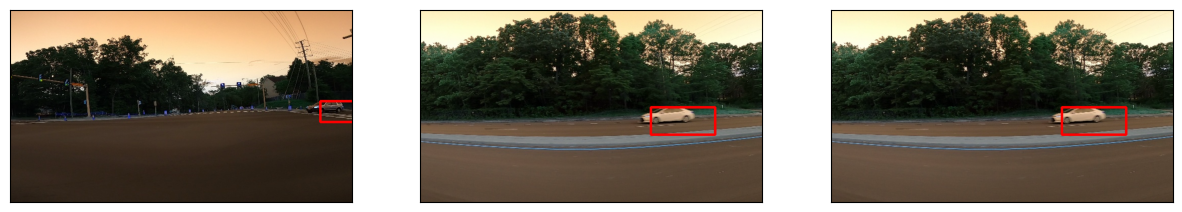

500/500 [==============================] - 147s 294ms/step - loss: 720.4217 - accuracy: 0.9672
Epoch 3/9
1/1 [==============================] - 0s 32ms/step


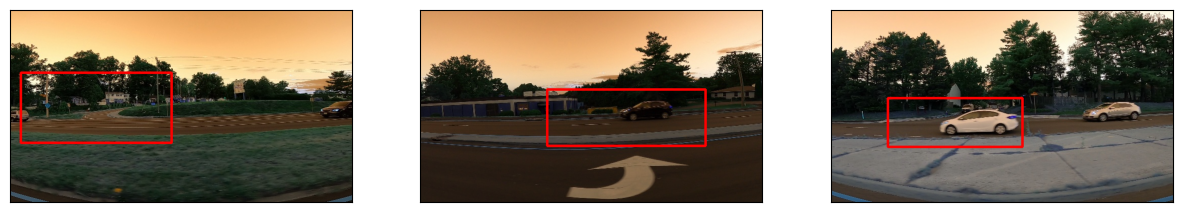

500/500 [==============================] - 145s 291ms/step - loss: 476.7732 - accuracy: 0.9755
Epoch 4/9
1/1 [==============================] - 0s 32ms/step


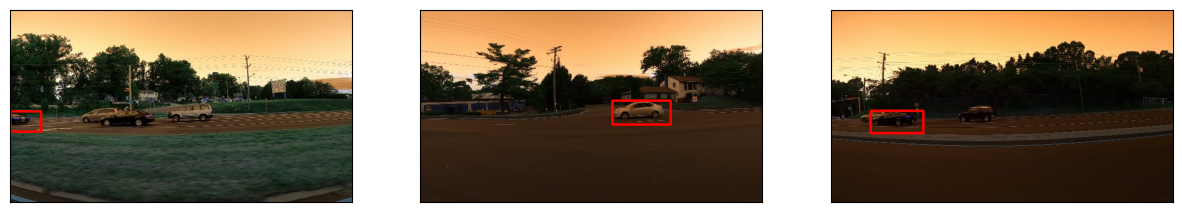

500/500 [==============================] - 146s 291ms/step - loss: 542.0374 - accuracy: 0.9661
Epoch 5/9
1/1 [==============================] - 0s 60ms/step


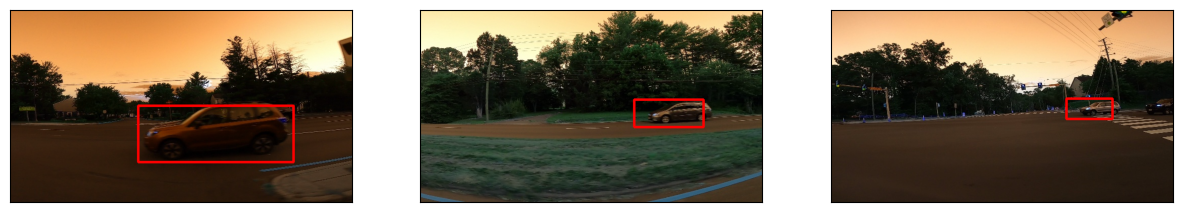

500/500 [==============================] - 145s 290ms/step - loss: 137.1340 - accuracy: 0.9876
Epoch 6/9
1/1 [==============================] - 0s 31ms/step


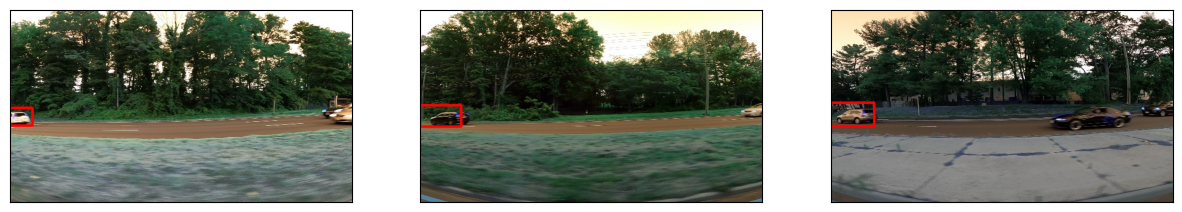

500/500 [==============================] - 146s 293ms/step - loss: 117.3607 - accuracy: 0.9859
Epoch 7/9
1/1 [==============================] - 0s 41ms/step


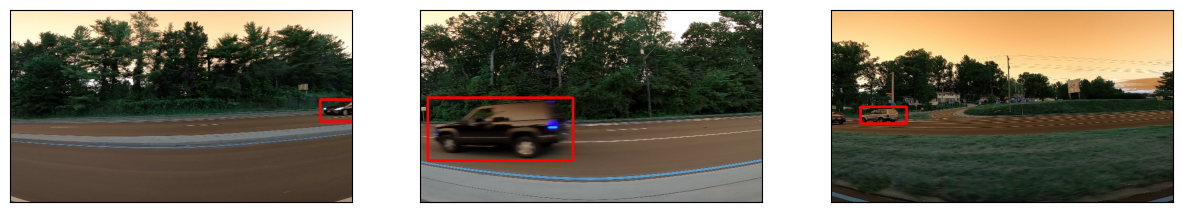

500/500 [==============================] - 147s 294ms/step - loss: 136.8975 - accuracy: 0.9876
Epoch 8/9
1/1 [==============================] - 0s 78ms/step


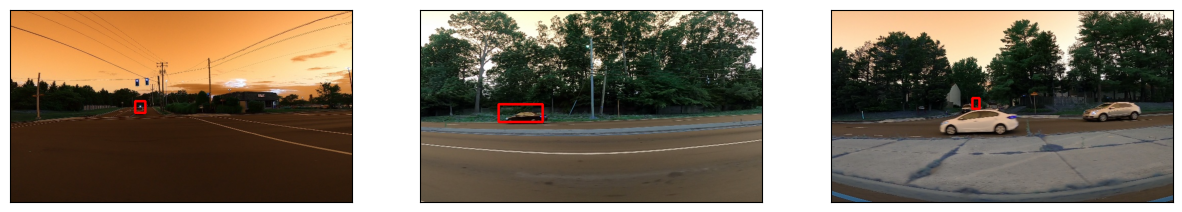

500/500 [==============================] - 148s 296ms/step - loss: 95.6548 - accuracy: 0.9898
Epoch 9/9
1/1 [==============================] - 0s 31ms/step


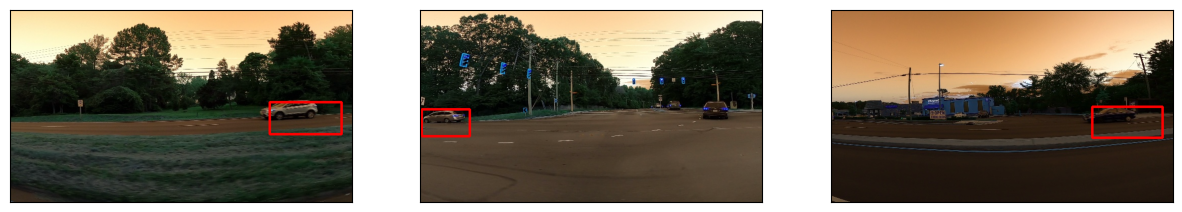

500/500 [==============================] - 147s 295ms/step - loss: 105.5932 - accuracy: 0.9884


In [28]:
with tf.device('/GPU:0'):
    _ = model.fit(
        data_generator(),
        epochs=9,
        steps_per_epoch=500,
        callbacks=[
            ShowTestImages(),
        ]
    )